In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In [42]:
# Use the Pathlib libary to set the path to the CSV
csv_pathwh = Path('whale_returns.csv')
csv_pathal = Path('algo_returns.csv')
csv_pathsp = Path('sp500_history.csv')
csv_pathcost = Path('cost_historical.csv')
csv_pathaapl =Path('aapl_historical.csv') 
csv_pathgoog = Path('goog_historical.csv')

# Whale Returns

In [43]:
# Reading whale returns
whale_df = pd.read_csv(csv_pathwh, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head(20)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [44]:
whale_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [45]:
whale_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [46]:
# Set the `columns` attribute to a new list of column names
columns = ["SOROS FUND MGT LLC", "PAULSON & CO.INC", "TIGER GLOBAL MGT LLC", "BERKSHIRE HATHAWAY INC"]
whale_df.columns = columns
whale_df.head()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [47]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for each column
whale_df.isnull().sum()

SOROS FUND MGT LLC        1
PAULSON & CO.INC          1
TIGER GLOBAL MGT LLC      1
BERKSHIRE HATHAWAY INC    1
dtype: int64

In [48]:
# Determining percentage of nulls
round((whale_df.isnull().sum() / len(whale_df) * 100),2)

SOROS FUND MGT LLC        0.09
PAULSON & CO.INC          0.09
TIGER GLOBAL MGT LLC      0.09
BERKSHIRE HATHAWAY INC    0.09
dtype: float64

In [49]:
# Use the `duplicated` function to determine the existance of duplicate rows: True or False
whale_df.duplicated()

Date
2015-03-02    False
2015-03-03    False
2015-03-04    False
2015-03-05    False
2015-03-06    False
              ...  
2019-04-25    False
2019-04-26    False
2019-04-29    False
2019-04-30    False
2019-05-01    False
Length: 1060, dtype: bool

In [50]:
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [51]:
# Cleanse nulls from DataFrame by filling na
whale_df= whale_df.fillna("0")
#whale_df['First_Name'] = whale_df['First_Name'].fillna("Unnamed")
#people_df['Last_Name'] = people_df['Last_Name'].fillna("Unnamed")
whale_df

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


# Algorithmic Daily Returns

In [52]:
# Reading Algorithmix returns
algo_df = pd.read_csv(csv_pathal, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [53]:
algo_df.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

In [54]:
algo_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [55]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for each column
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [56]:
# Determining percentage of nulls
round((algo_df.isnull().sum() / len(algo_df) * 100),2)

Algo 1    0.00
Algo 2    0.48
dtype: float64

In [57]:
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [58]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for each column
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [59]:
#earliest_date = algo_df["Date"].min()
#latest_date = algo_df["Date"].max()

# print the earliest and latest dates
#print(earliest_date)
#print(latest_date) --- Discuss with your TA why you are getting error

In [60]:
# If you want to select records within a data range,After setting the `Date` as the index, loc can be used to specify a range of dates
six_month_filtered_df = algo_df.loc['2017-01-03':'2017-06-03', :]
six_month_filtered_df

,Algo 1,Algo 2
Date,,
2017-01-03,0.007381,0.009358
2017-01-04,0.012510,0.014701
2017-01-05,-0.003955,-0.001872
2017-01-06,-0.000364,0.000051
2017-01-09,0.002775,-0.006277
...,...,...
2017-05-26,0.000340,0.001880
2017-05-30,-0.012335,-0.005713
2017-05-31,-0.001981,-0.001719


In [61]:
columns = ["ALGO1","ALGO2"]
algo_df.columns = columns
algo_df.head()

,ALGO1,ALGO2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


# S&P 500 Returns

In [62]:
# Reading S&P 500 Closing Prices
sp_df = pd.read_csv(csv_pathsp, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.sort_index(inplace=True)
sp_df.head(100)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2013-02-20,$1511.95
2013-02-21,$1502.42
2013-02-22,$1515.60


In [63]:
# Determining percentage of nulls
round((sp_df.isnull().sum() / len(sp_df) * 100),2)

Close    0.0
dtype: float64

In [64]:
sp_df.dtypes

Close    object
dtype: object

In [65]:
# Clean identified numeric fields with $ symbol
sp_df["Close"] = sp_df["Close"].str.replace("$", "")
sp_df["Close"]
sp_df.head(100)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2013-02-20,1511.95
2013-02-21,1502.42
2013-02-22,1515.60


# Check data type

In [66]:
algo_df.dtypes

ALGO1    float64
ALGO2    float64
dtype: object

In [76]:
whale_df.dtypes

SOROS FUND MGT LLC        float64
PAULSON & CO.INC          float64
TIGER GLOBAL MGT LLC      float64
BERKSHIRE HATHAWAY INC    float64
dtype: object

In [77]:
sp_df.dtypes

Close    float64
dtype: object

In [78]:
# Fix Data Types
# Use the `as_type` function to convert `Person_ID` from `float` to `int`
#people_df['Person_ID'] = people_df['Person_ID'].astype('int')
#people_df
sp_df = sp_df.astype("float")
sp_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [79]:
# Check Data type again
sp_df.dtypes

Close    float64
dtype: object

In [80]:
 # Calculate Daily Returns
sp_daily_returns = sp_df.pct_change().dropna()
sp_daily_returns.head(100)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2013-02-21,-0.006303
2013-02-22,0.008773
2013-02-25,-0.018310


In [81]:
sp_df.count()

Close    1649
dtype: int64

In [33]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for 
#each column
sp_df.isnull().sum()

Close    0
dtype: int64

In [34]:
sp_df.dropna(inplace=True)
sp_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [35]:
# Set the `columns` attribute to a new list of column names
columns = ["SP_RETURNS"]
sp_daily_returns.columns = columns
sp_daily_returns.head()

,SP_RETURNS
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


 # Combine Whale, Algorithmic, and S&P 500 Returns

In [36]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for 
#each portfolio's returns.
# Concat returns DataFrames
all_returns = pd.concat([whale_df,algo_df,sp_daily_returns], axis='columns', join='inner')
all_returns.sort_index(inplace=True)
all_returns.head()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


#  Conduct Quantitative Analysis

## Performance Anlysis

### Calculate and Plot the daily returns.

In [37]:
 # Plot daily returns of all portfolios
 # Calculate Daily Returns
#combined_daily_returns = all_returns.pct_change().dropna()

# Sort datetime index in ascending order (past to present)
all_returns.sort_index(inplace=True)

all_returns.head()
 

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


<AxesSubplot:title={'center':'DAILY RETURNS OF ALL PORTFOLIOS'}, xlabel='Date'>

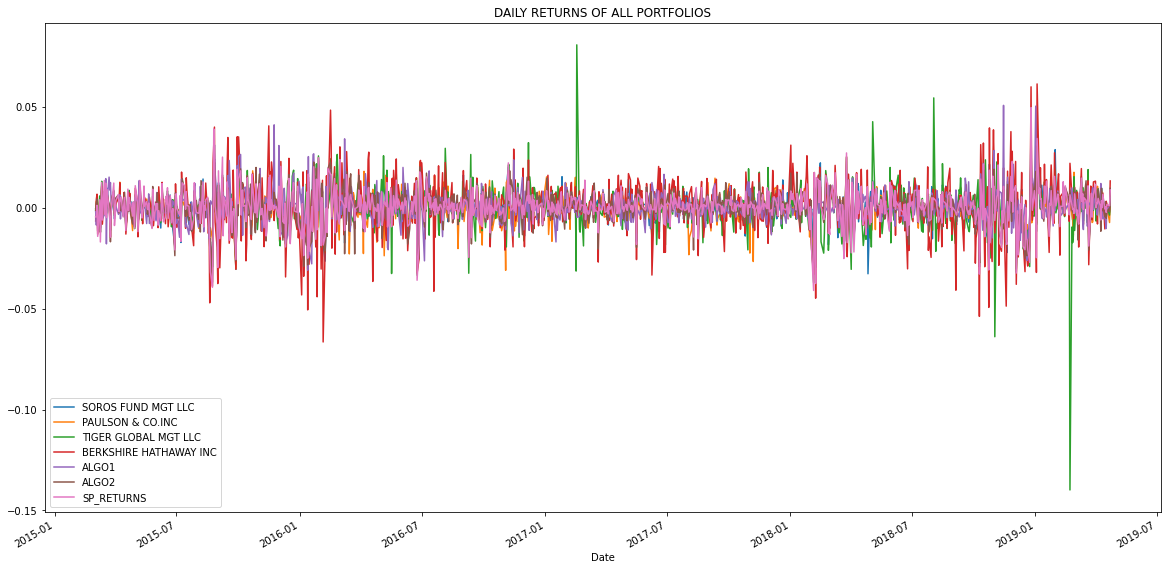

In [38]:
 # Plot daily returns of all portfolios
# Plot the daily returns of the combined portfolio  over the last 5 years
all_returns.plot(figsize=(20,10) , title='DAILY RETURNS OF ALL PORTFOLIOS')


###  Calculate and Plot cumulative returns.

In [41]:
 # Calculate cumulative returns of all portfolios
 # Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + all_returns).cumprod() -1

# Sort datetime index in ascending order (past to present)
cumulative_returns.sort_index(inplace=True)

cumulative_returns.head()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


In [63]:
weights = [0.143,0.143,0.143,0.143,0.142,0.143,0.143]
portfolio_returns = all_returns.dot(weights)
portfolio_returns.head()

Date
2015-03-03   -0.002964
2015-03-04   -0.000479
2015-03-05    0.003109
2015-03-06   -0.009097
2015-03-09    0.001264
dtype: float64

In [139]:
cumulative_returns = (1 + portfolio_returns).cumprod() -1
# Sort datetime index in ascending order (past to present)
cumulative_returns.sort_index(inplace=True)
cumulative_returns.head(100)

Date
2015-03-03   -0.002964
2015-03-04   -0.003442
2015-03-05   -0.000343
2015-03-06   -0.009437
2015-03-09   -0.008185
                ...   
2015-07-17    0.006825
2015-07-20    0.002003
2015-07-21   -0.000076
2015-07-22   -0.001883
2015-07-23   -0.005607
Length: 100, dtype: float64

<AxesSubplot:title={'center':'CULMULATIVE RETURNS PLOT'}, xlabel='Date'>

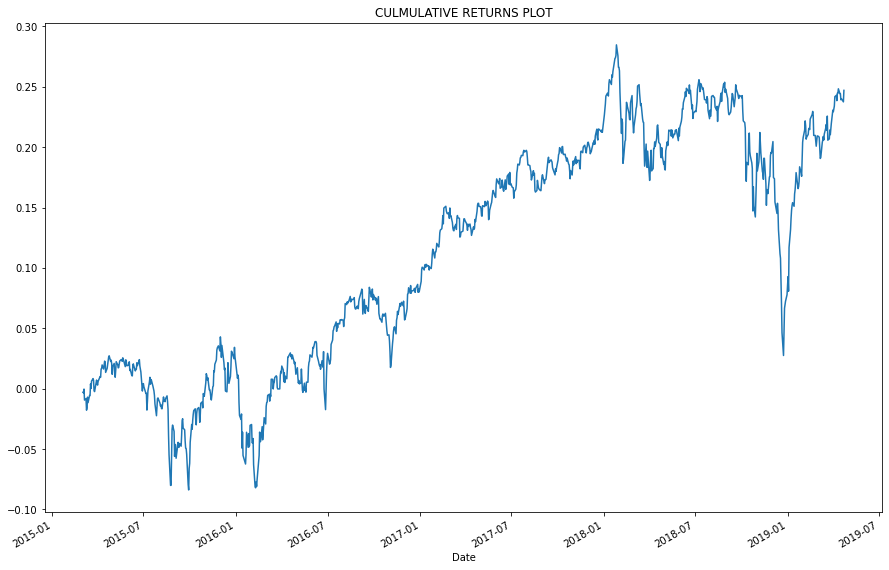

In [140]:
# Plot the daily returns of the S&P 500 over the last 5 years
cumulative_returns.plot(figsize=(15,10), title='CULMULATIVE RETURNS PLOT')

# Risk Analysis

###  Create a box plot for each portfolio

<AxesSubplot:title={'center':'BOX PLOT FOR EACH PORTFOLIO'}>

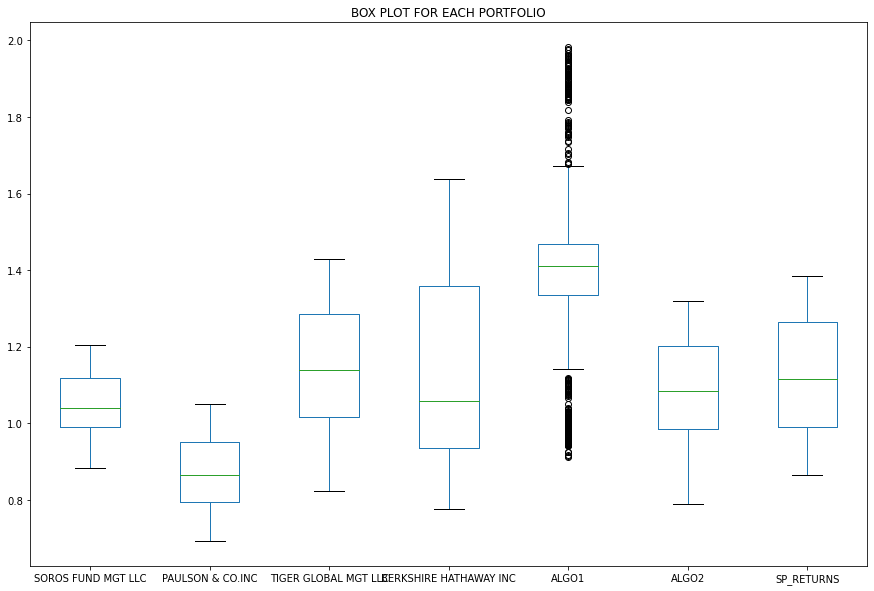

In [51]:
# Box plot to visually show risk
# Plot box plot
cumulative_returns.plot.box(figsize=(15, 10), title='BOX PLOT FOR EACH PORTFOLIO')

###  Calculate Standard Deviations

In [74]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std().fillna("0")
###daily_std = combined_daily_returns.std()
###daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

SOROS FUND MGT LLC        0.007895
PAULSON & CO.INC          0.007023
TIGER GLOBAL MGT LLC      0.010894
BERKSHIRE HATHAWAY INC    0.012919
ALGO1                     0.007620
dtype: float64

In [82]:
# Identify the stock with the most risk - STD for daily returns
#daily_std = daily_std.astype("float")
daily_std = daily_std.sort_values(ascending=False)
daily_std.head(100)

BERKSHIRE HATHAWAY INC    0.012919
TIGER GLOBAL MGT LLC      0.010894
SP_RETURNS                0.008554
ALGO2                     0.008342
SOROS FUND MGT LLC        0.007895
ALGO1                     0.007620
PAULSON & CO.INC          0.007023
dtype: float64

In [84]:
# Calculate the annualized standard deviation (252 trading days)
#daly= daily_std.fillna("0")
daily_std = daily_std.astype("float")
annualized_std = daily_std* np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False)
annualized_std.head()

BERKSHIRE HATHAWAY INC    0.205077
TIGER GLOBAL MGT LLC      0.172936
SP_RETURNS                0.135786
ALGO2                     0.132430
SOROS FUND MGT LLC        0.125335
dtype: float64

In [60]:
###Calculate  the daily standard deviation of S&P 500
sp_daily_returns_std = sp_daily_returns.std().fillna("0")
sp_daily_returns_std.head()

SP_RETURNS    0.008111
dtype: float64

In [ ]:
# Determine which portfolios are riskier than the S&P 500

In [61]:
# Identify the stock with the most risk
annualized_std = annualized_std.sort_values(ascending=False)
annualized_std.head(100)

BERKSHIRE HATHAWAY INC    0.205077
TIGER GLOBAL MGT LLC      0.172936
SP_RETURNS                0.135786
ALGO2                     0.132430
SOROS FUND MGT LLC        0.125335
ALGO1                     0.120967
PAULSON & CO.INC          0.111488
dtype: float64

### In my opinion, Berkshire and Tiger are more riskier than the S&P 500 because they have higner standard devistion more than S&P 500

 # Rolling Statistics

## Calculate and plot rolling std for all portfolios with 21-day window

In [86]:
 ##### Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns.rolling(window=21).std()

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:title={'center':'rolling standard deviation'}, xlabel='Date'>

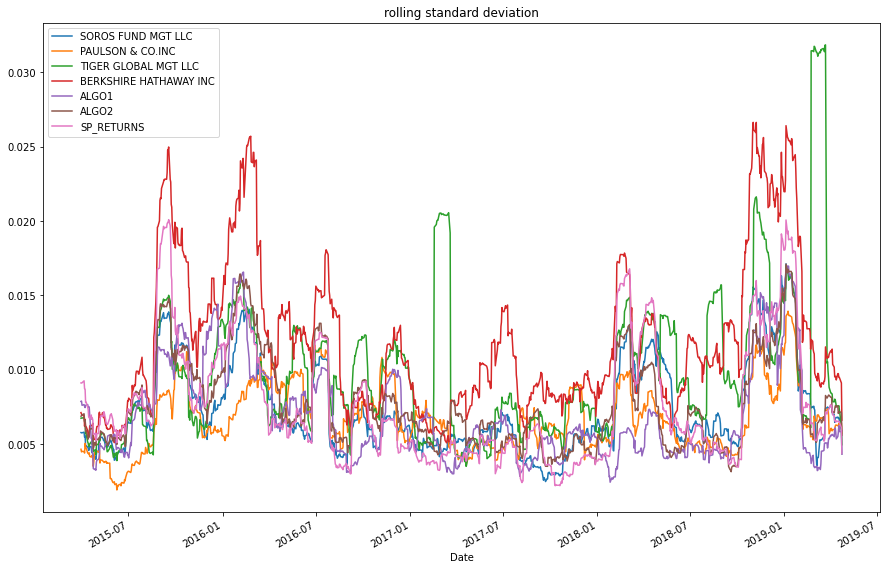

In [91]:
# Plot the rolling standard deviation
all_returns.rolling(window=21).std().plot(figsize=(15, 10), title='rolling standard deviation')

<AxesSubplot:title={'center':'culmulative rolling standard deviation'}, xlabel='Date'>

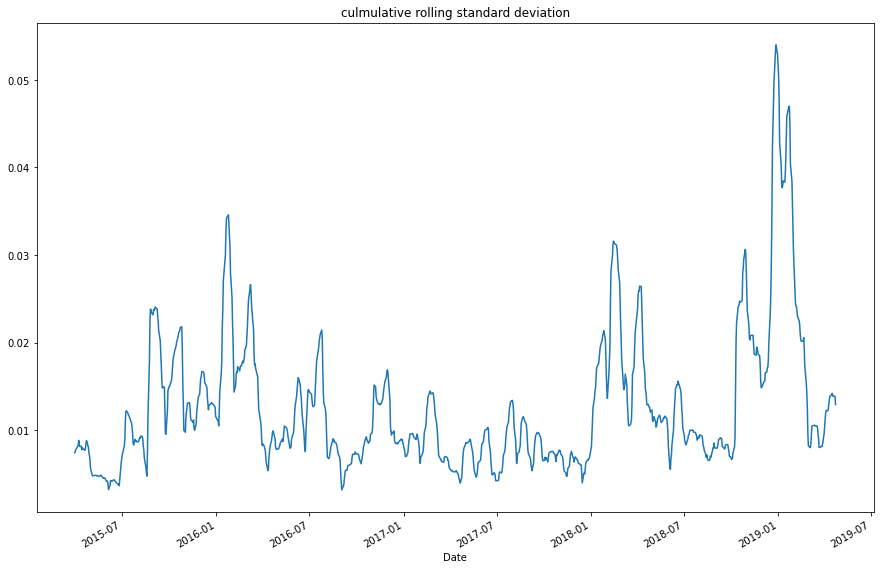

In [92]:
# Plot the culmulative rolling standard deviation
cumulative_returns.rolling(window=21).std().plot(figsize=(15, 10), title='culmulative rolling standard deviation')

#  Calculate and plot the correlation

In [98]:
 # Calculate the correlation
    # Calculate the correlation between each column
correlation = all_returns.corr()
correlation

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
SOROS FUND MGT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MGT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
ALGO1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
ALGO2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP_RETURNS,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

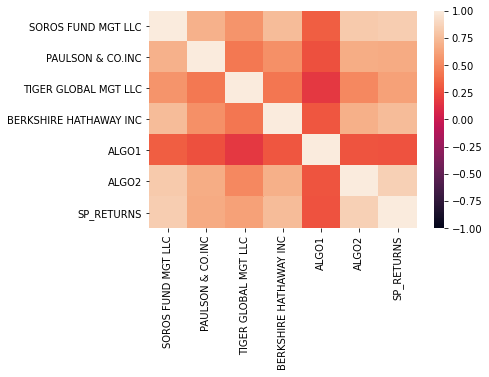

In [100]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

#  Calculate and Plot Beta for a chosen portfolio (ALGO2) and the S&P 500

In [113]:
 # Calculate Covariance of S&P  returns vs. ALGO2 returns
covariance = all_returns['ALGO2'].cov(all_returns['SP_RETURNS'])
covariance

6.127932374145016e-05

In [114]:
# Calculate variance of S&P 500
variance = all_returns['ALGO2'].var()
variance

6.959354551789667e-05

In [119]:
# Computing beta
ALGO2_beta = covariance / variance
ALGO2_beta

0.8805317114601035

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of ALGO2 Returns vs. S&P 500 Returns'}, xlabel='Date'>

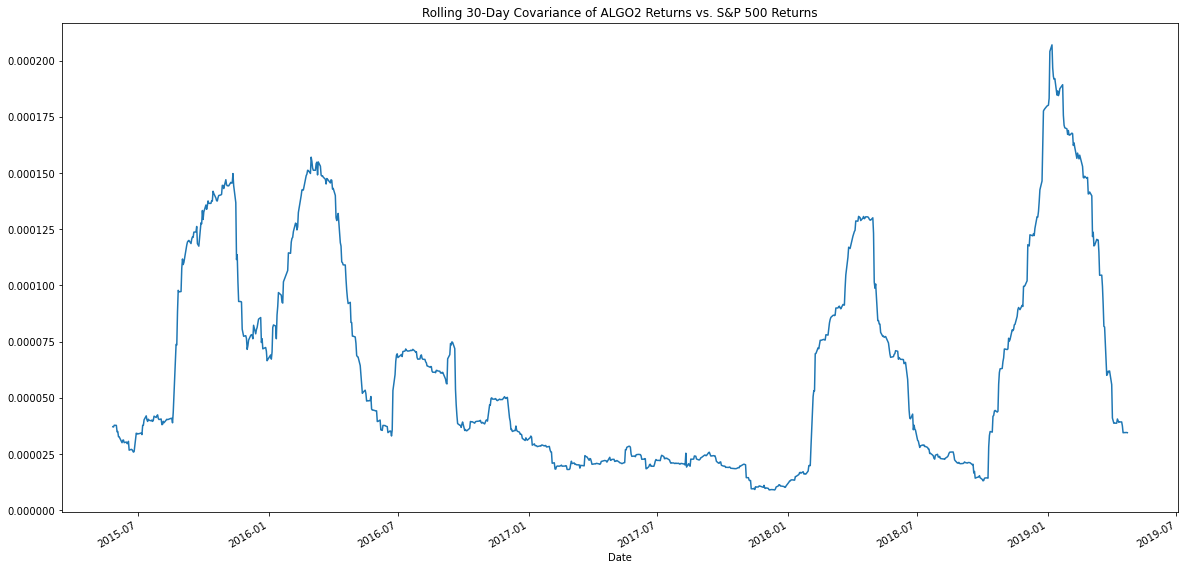

In [117]:
# Calculate 30-Day Rolling Covariance of ALGO2 vs. ALGO2  Returns¶
rolling_covariance = all_returns['ALGO2'].rolling(window=60).cov(all_returns['SP_RETURNS'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of ALGO2 Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of ALGO2 Returns'}, xlabel='Date'>

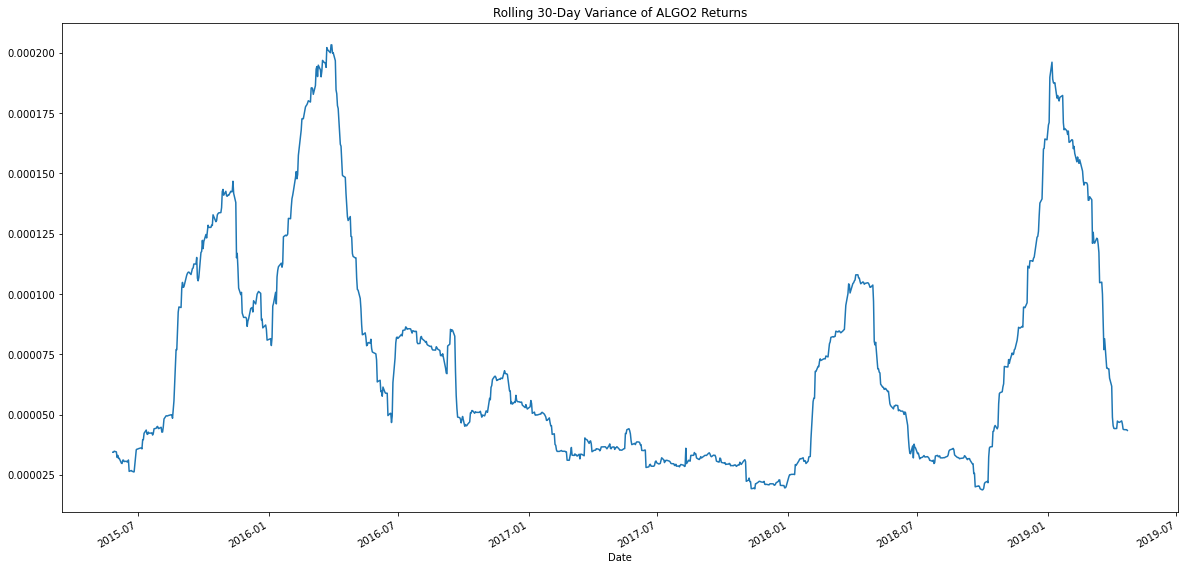

In [118]:
# Calculate 30-day rolling variance of ALGO2 and plot the data
rolling_variance = all_returns['ALGO2'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of ALGO2 Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Beta of S&P 500'}, xlabel='Date'>

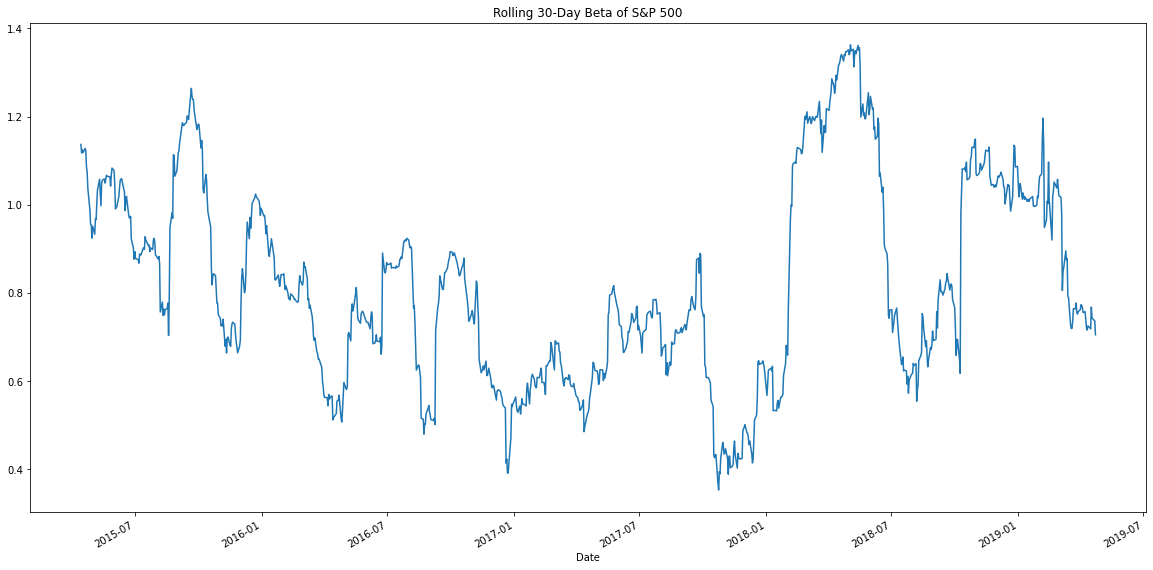

In [112]:
# Calculate 30-day rolling beta of S&P 500 and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of ALGO2')

#  Rolling Statistics Challenge: Exponentially Weighted Average

In [ ]:
# Use `ewm` to calculate the rolling window


#  Sharpe Ratios

## Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [120]:
 # Annualized Sharpe Ratios
all_returns

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [121]:
correlation1 = all_returns.corr()
correlation1

,SOROS FUND MGT LLC,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2,SP_RETURNS
SOROS FUND MGT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MGT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
ALGO1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
ALGO2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP_RETURNS,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [122]:
# Alternatively, sum total correlation for each stock
correlation1.sum(axis=0).sort_values()

ALGO1                     2.614209
TIGER GLOBAL MGT LLC      3.715893
PAULSON & CO.INC          4.296740
BERKSHIRE HATHAWAY INC    4.455893
ALGO2                     4.847528
SOROS FUND MGT LLC        5.001465
SP_RETURNS                5.021171
dtype: float64

In [123]:
# Drop highly correlated stocks and keep only the non-correlated stocks
noncorrelated_daily_returns = all_returns.drop(columns=['SP_RETURNS', 'SOROS FUND MGT LLC'])
noncorrelated_daily_returns.head()

,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2
Date,,,,,
2015-03-03,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.004225,0.005843,-0.001652,-0.005447,0.001303


In [130]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios

PAULSON & CO.INC         -0.483570
TIGER GLOBAL MGT LLC     -0.121060
BERKSHIRE HATHAWAY INC    0.621810
ALGO1                     1.378648
ALGO2                     0.501364
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios as a bar plot'}>

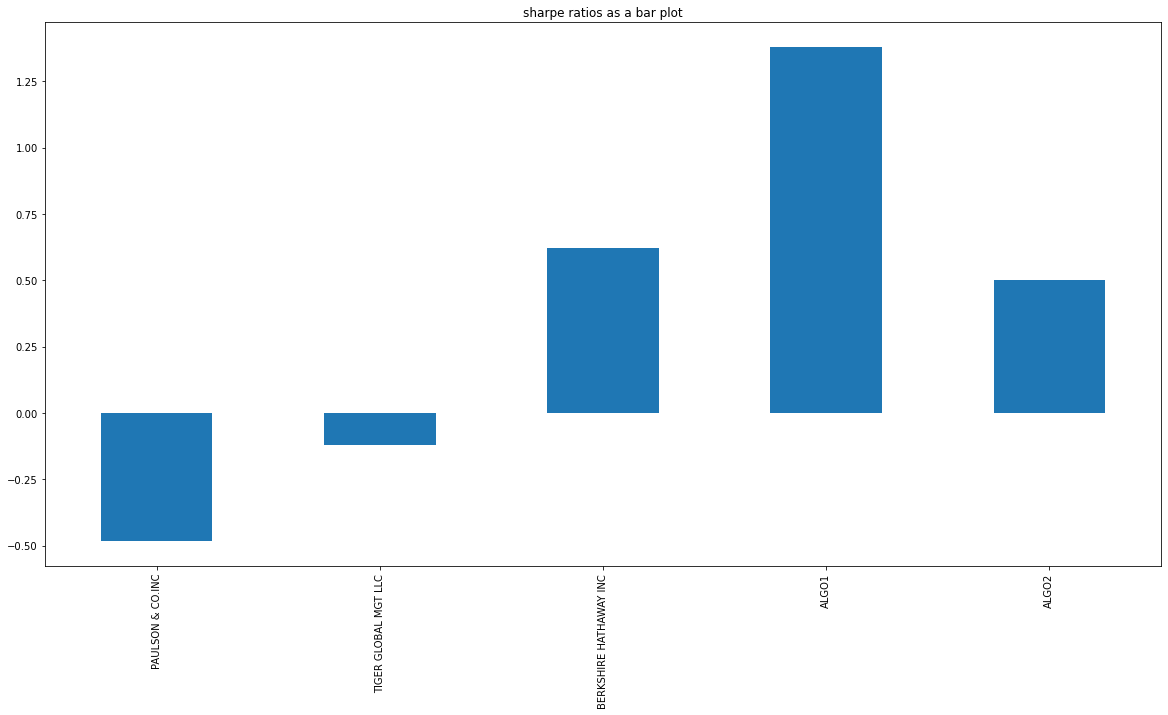

In [128]:
sharpe_ratios.plot(figsize=(20, 10), title='sharpe ratios as a bar plot',kind="bar")

In [131]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks
# candidate_daily_returns = noncorrelated_daily_returns.drop(columns=['PAULSON & CO.INC', 'TIGER GLOBAL MGT LLC'])
candidate_daily_returns = noncorrelated_daily_returns
candidate_daily_returns.head()

,PAULSON & CO.INC,TIGER GLOBAL MGT LLC,BERKSHIRE HATHAWAY INC,ALGO1,ALGO2
Date,,,,,
2015-03-03,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.004225,0.005843,-0.001652,-0.005447,0.001303


<AxesSubplot:xlabel='Date'>

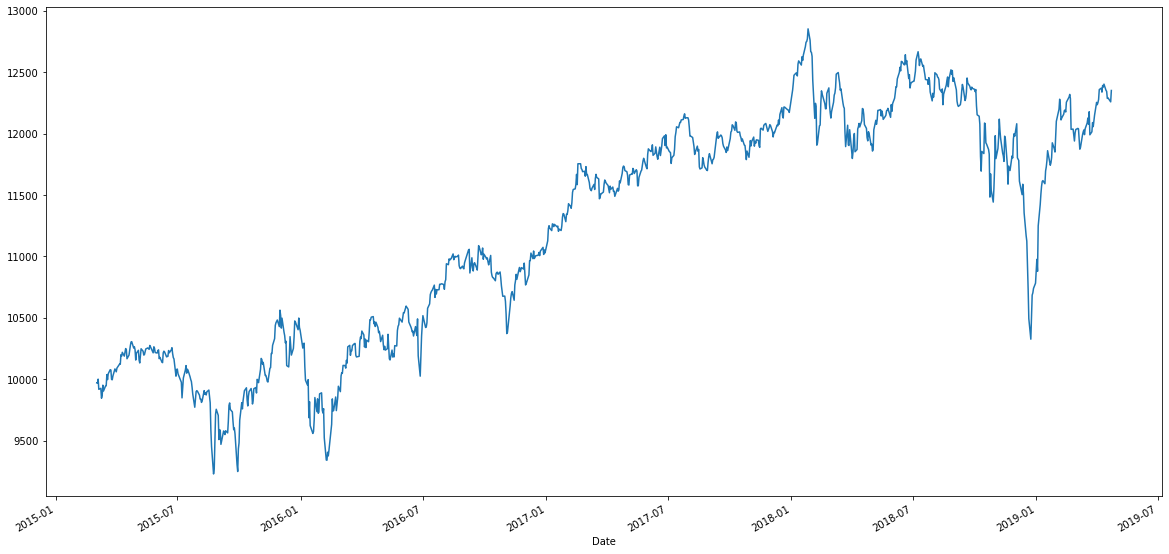

In [132]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.2, .2, .2, .2, .2]
candidate_portfolio_returns = candidate_daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

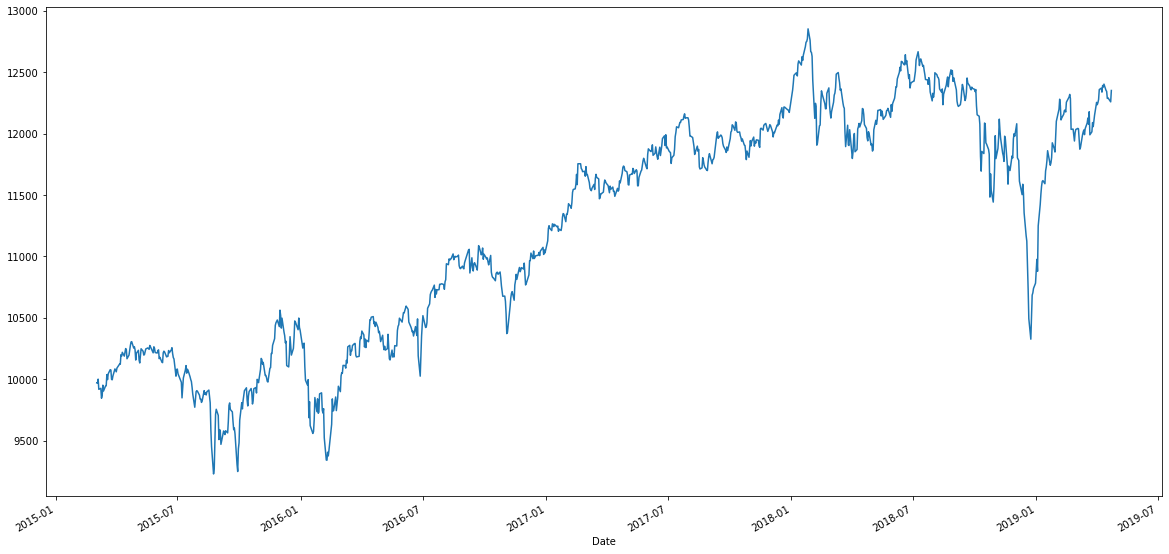

In [133]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio
initial_investment = 10000
weights = [.2, .2, .2, .2, .2]
noncorrelated_portfolio_returns = noncorrelated_daily_returns.dot(weights)
noncorrelated_cumulative_returns = (1 + noncorrelated_portfolio_returns).cumprod()
noncorrelated_cumulative_profits = (initial_investment * noncorrelated_cumulative_returns)
noncorrelated_cumulative_profits.plot(figsize=(20,10))

In [ ]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Unoptimized Portfolio
initial_investment = 10000
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
unoptimized_portfolio_returns = daily_returns.dot(weights)
unoptimized_cumulative_returns = (1 + unoptimized_portfolio_returns).cumprod()
unoptimized_cumulative_profits = (initial_investment * unoptimized_cumulative_returns)
unoptimized_cumulative_profits.plot(figsize=(20,10))

In [ ]:
aapl_historical